In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create some toy data

In [12]:
# create 3 classes each with 100 samples which are not linearly separable
r = np.tile(np.r_[0:1:100j],3)
t = np.r_[0:np.pi*4:300j] + np.random.rand(300)
x_train = np.c_[r*np.sin(t), r*np.cos(t)]
y_train = np.arange(3).repeat(100)

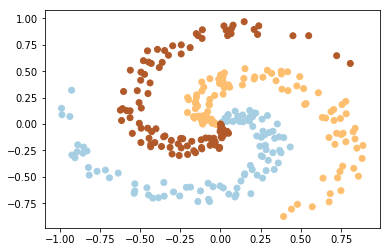

In [16]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Define a Neural Network model

In [35]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super().__init__()
        self.fc1=nn.Linear(input_size, hidden_size)
        self.relu1=nn.ReLU()
        self.fc2=nn.Linear(hidden_size, num_class)
        
        
    def forward(self, x):                      
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        
        return out

In [39]:
model = NeuralNet(2,128,3)

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Loss: 1.0975849628448486 at epoch: 1


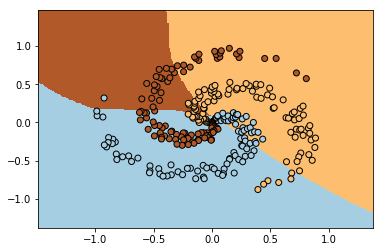

Loss: 0.01162820216268301 at epoch: 1001


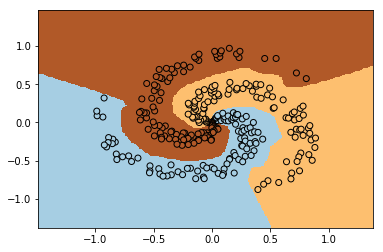

Loss: 0.011253956705331802 at epoch: 2001


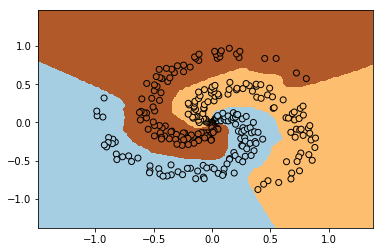

Loss: 0.011161677539348602 at epoch: 3001


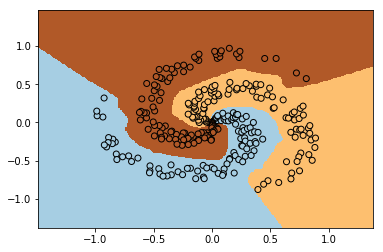

Loss: 0.01123249251395464 at epoch: 4001


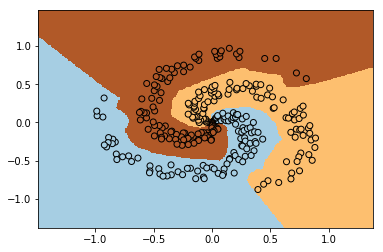

Loss: 0.011474629864096642 at epoch: 5001


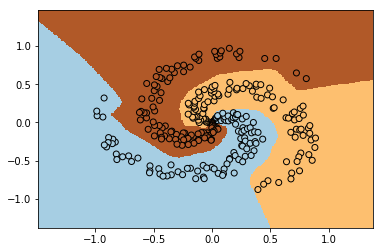

Loss: 0.011201622895896435 at epoch: 6001


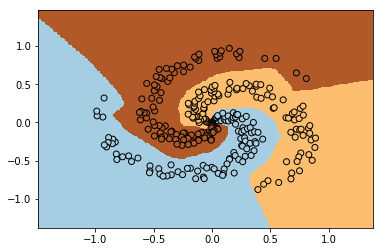

Loss: 0.0111014349386096 at epoch: 7001


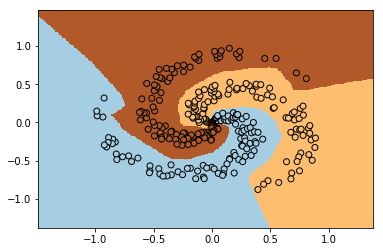

Loss: 0.011045155115425587 at epoch: 8001


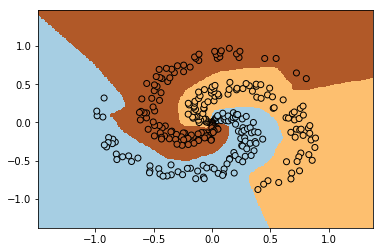

Loss: 0.01102860365062952 at epoch: 9001


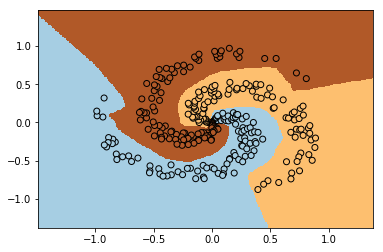

In [63]:
for epoch in range(1, 10001):
    y_pred_score = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_pred_score, torch.from_numpy(y_train.astype(np.int64)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%1000==1:
        print(f'Loss: {loss} at epoch: {epoch}')
        plot_decision_boundary(x_train, y_train, model)

In [42]:
def predict(m, X):
    if isinstance(X, np.ndarray):
        X = torch.from_numpy(X.astype(np.float32))
        return torch.max(m(X),1)[1]

In [33]:
def plot_decision_boundary(x_train, y_train, model):
    x1_min, x2_min = x_train.min(0) - 0.5
    x1_max, x2_max = x_train.max(0) + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    y_pred = predict(model, np.c_[x1.ravel(), x2.ravel()])
    plt.pcolormesh(x1,x2,y_pred.data.numpy().reshape(x1.shape), cmap=plt.cm.Paired)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    plt.show()

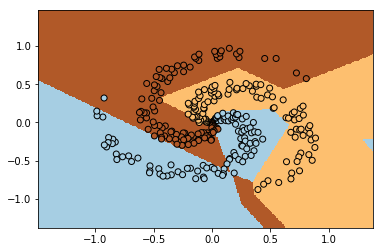

In [34]:
plot_decision_boundary(x_train, y_train, model)

In [59]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super().__init__()
        self.fc1=nn.Linear(input_size, hidden_layer)
        self.relu1 = nn.ReLU()
        self.fc2=nn.Linear(hidden_layer,hidden_layer)
        self.relu2 = nn.ReLU()
        self.fc3=nn.Linear(hidden_layer, num_classes)
        
    def forward(self, x):
        out=self.fc1(x)
        out=self.relu1(out)
        out=self.fc2(out)
        out=self.relu2(out)
        out=self.fc3(out)
        
        return out
        

In [60]:
model = NeuralNet2(2,64,3)